In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

sys.path.append('/user_data/mmhender/featsynth/')

project_root = '/user_data/mmhender/featsynth/'
expt_name = 'pilot1'
data_folder = os.path.join(project_root, 'online_data', expt_name)
preproc_folder = os.path.join(data_folder, 'preproc')

In [2]:
data_filename = os.path.join(preproc_folder, 'preproc_data_all.csv')
trial_data_all = pd.read_csv(data_filename)
subjects = np.unique(trial_data_all['subject'])
n_subjects = len(subjects)
subject_cb = np.array([np.array(trial_data_all['which_cb'])[trial_data_all['subject']==si][0] \
              for si in subjects])
subjects

array([1, 2, 3, 4, 5])

In [3]:
image_type_names = np.array(['intact', 'match pool1', 'match pool2', 'match pool3', 'match pool4'])
cue_level_names = ['cue basic', 'cue superordinate']

type_order_plot = [1,2,3,4,0]

In [5]:
info = subject_info[0]

cue_level_vals = np.unique(info['cue_level'])
n_cue_levels = len(cue_level_vals)

image_type_vals = np.unique(info['image_type_num'])
n_image_types = len(image_type_vals)

acc_by_condition = np.zeros((n_subjects, n_cue_levels, n_image_types))
propyes_by_condition = np.zeros((n_subjects, n_cue_levels, n_image_types))
overall_acc = np.zeros((n_subjects,))

acc_by_supcat = [np.zeros((np.sum(subject_cb==cb), n_cue_levels, n_image_types, n_supcat)) \
                 for cb in [1,2]]
cb_sub_count = [0,0]

for si in range(n_subjects):
    
    info = subject_info[si]
    trial_data = subject_data[si]
    
    overall_acc[si] = np.mean(trial_data['correct'])

    if subject_cb[si]==1:
        cbi=0;
    else:
        cbi=1;

    supnames = super_names_eachset[cbi]
      
    for cc, cue in enumerate(cue_level_vals):

        for ii, imtype in enumerate(image_type_vals):

            inds = (info['cue_level']==cue) & (info['image_type_num']==imtype)

            acc_by_condition[si, cc,ii] = np.mean(trial_data['correct'][inds])

            propyes_by_condition[si, cc,ii] = np.mean(trial_data['resp'][inds]==1)
            
            for sc, supcat in enumerate(supnames):
                
                inds = (info['cue_level']==cue) & \
                        (info['image_type_num']==imtype) & \
                        (info['super_name']==supcat)
                
                acc_by_supcat[cbi][cb_sub_count[cbi],cc,ii,sc] = np.mean(trial_data['correct'][inds])

    cb_sub_count[cbi]+=1
     

NameError: name 'subject_info' is not defined

In [4]:
cc = 0; # basic
ii = 1; # pool1 (hardest)

for cbi, cb in enumerate([1,2]):

    vals = acc_by_supcat[cbi][subjects_use[subject_cb==cb],:,:,:]

    supnames = super_names_eachset[cbi]

    plot_vals = vals[:,cc,ii,:]
    meanvals = np.mean(plot_vals, axis=0)
    semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])
    plt.figure()
    plt.bar(np.arange(len(meanvals)), meanvals)
    plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, linestyle='none', color='k')
    plt.axhline(0.50, color=[0.8, 0.8, 0.8], linestyle='--')
    plt.xticks(np.arange(len(meanvals)), supnames, rotation=45)
    plt.ylim([0.2, 1.0])

    plt.title('%s, %s'%(image_type_names[ii], cue_level_names[cc]))

NameError: name 'acc_by_supcat' is not defined

In [18]:
super_names_eachset

[array(['bird', 'body_part', 'drink', 'fruit', 'kitchen_tool', 'plant'],
       dtype=object),
 array(['clothing', 'dessert', 'insect', 'office_supply',
        'sports_equipment', 'vegetable'], dtype=object)]

In [19]:
is_natural = [np.array([1,1,0,1,0,1]).astype(bool), \
              np.array([0,0,1,0,0,1]).astype(bool)]
[super_names_eachset[cbi][is_natural[cbi]] for cbi in [0,1]], \
[super_names_eachset[cbi][~is_natural[cbi]] for cbi in [0,1]]

([array(['bird', 'body_part', 'fruit', 'plant'], dtype=object),
  array(['insect', 'vegetable'], dtype=object)],
 [array(['drink', 'kitchen_tool'], dtype=object),
  array(['clothing', 'dessert', 'office_supply', 'sports_equipment'],
        dtype=object)])

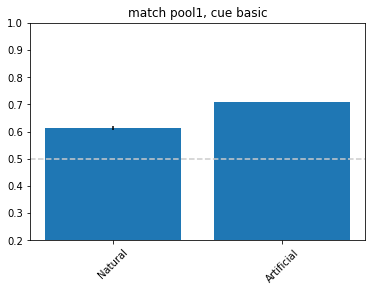

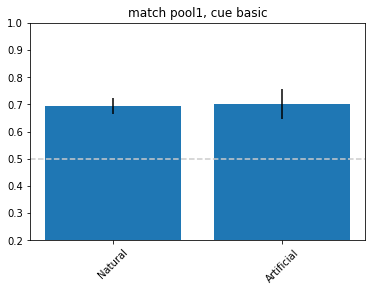

In [20]:
cc = 0; # basic
ii = 1; # pool1 (hardest)

for cbi, cb in enumerate([1,2]):

    vals = acc_by_supcat[cbi][subjects_use[subject_cb==cb],:,:,:]

    supnames = super_names_eachset[cbi]

    plot_vals = vals[:,cc,ii,:]
    
    # average over natural and artificial superordinate categories
    plot_vals = np.concatenate([np.mean(plot_vals[:,is_natural[cbi]==nn], axis=1, keepdims=True) \
                 for nn in [True, False]], axis=1)
    kind_names = ['Natural','Artificial']
   
    
    meanvals = np.mean(plot_vals, axis=0)
    semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])
    plt.figure()
    plt.bar(np.arange(len(meanvals)), meanvals)
    plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, linestyle='none', color='k')
    plt.axhline(0.50, color=[0.8, 0.8, 0.8], linestyle='--')
    plt.xticks(np.arange(len(meanvals)), kind_names, rotation=45)
    plt.ylim([0.2, 1.0])

    plt.title('%s, %s'%(image_type_names[ii], cue_level_names[cc]))

In [132]:
meanvals

array([0.75      , 0.58333333, 0.83333333, 0.54166667, 0.58333333,
       0.58333333])

In [95]:
np.unique(np.array(info['super_name'])[inds])

array(['bird', 'body_part', 'drink', 'fruit', 'kitchen_tool', 'plant'],
      dtype=object)

In [70]:
super_intact_acc = acc_by_condition[:,1,0]

In [71]:
cue_level_vals, image_type_vals

(array(['basic', 'super'], dtype=object), array([0., 1., 2., 3., 4.]))

In [106]:
subject_cb[subjects_use]

array([1., 1., 2., 2., 2.])

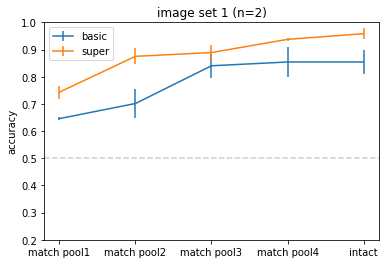

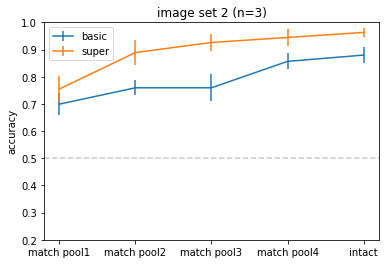

In [108]:
for cb in [1,2]:

    subjects_plot = (subject_cb==cb) & subjects_use
    n_subs_plot = np.sum(subjects_plot)
    
    plt.figure()
    ax = plt.subplot(1,1,1)

    lh = []
    for cc, cue in enumerate(cue_level_vals):

        vals = acc_by_condition[subjects_plot,cc,:]

        meanvals = np.mean(vals, axis=0)
        semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)

        h = plt.errorbar(np.arange(n_image_types), meanvals[type_order_plot], semvals[type_order_plot])
        # h, = plt.plot(vals[type_order_plot], '.-')
        plt.xticks(np.arange(n_image_types), image_type_names[type_order_plot])
        lh.append(h)

    plt.axhline(0.50, color=[0.8, 0.8, 0.8], linestyle='--')

    ax.legend(lh, cue_level_vals)

    plt.ylabel('accuracy')

    plt.ylim([0.2, 1.0])
    
    plt.title('image set %d (n=%d)'%(cb,n_subs_plot))

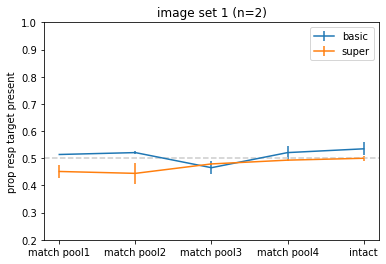

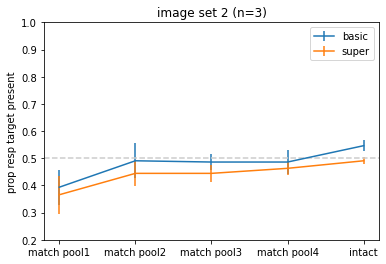

In [109]:
for cb in [1,2]:

    subjects_plot = (subject_cb==cb) & subjects_use
    n_subs_plot = np.sum(subjects_plot)

    plt.figure()
    ax = plt.subplot(1,1,1)

    lh = []
    for cc, cue in enumerate(cue_level_vals):

        vals = propyes_by_condition[subjects_plot,cc,:]

        meanvals = np.mean(vals, axis=0)
        semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)

        h = plt.errorbar(np.arange(n_image_types), meanvals[type_order_plot], semvals[type_order_plot])

        plt.xticks(np.arange(n_image_types), image_type_names[type_order_plot])
        lh.append(h)

    plt.axhline(0.50, color=[0.8, 0.8, 0.8], linestyle='--')

    ax.legend(lh, cue_level_vals)

    plt.ylabel('prop resp target present')

    plt.ylim([0.2, 1.0])
    
    plt.title('image set %d (n=%d)'%(cb,n_subs_plot))

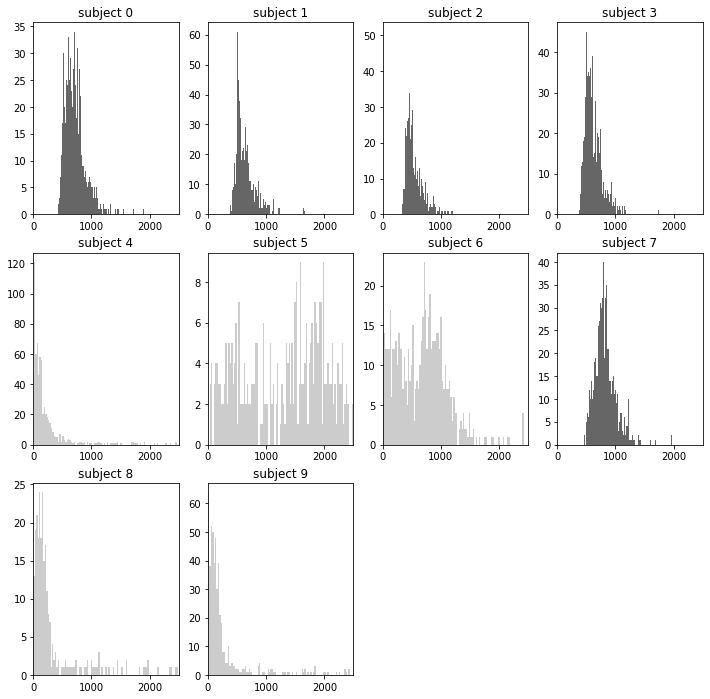

In [111]:
plt.figure(figsize=(12,12))
npy = int(np.ceil(np.sqrt(n_subjects)))
npx = int(np.ceil(n_subjects/npy))
xlims = [0, 2500]


for si in range(n_subjects):

    plt.subplot(npx, npy, si+1)
    
    rts = subject_data[si]['rt']
    
    if subjects_use[si]:
        plt.hist(rts,100, color=[0.4, 0.4, 0.4]);
    else:
        plt.hist(rts,100, color=[0.8, 0.8, 0.8]);
    plt.title('subject %d'%si)
    
    plt.xlim(xlims)